<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/Assignment1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

In [1]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_a1.sh > fetch_a1.sh
!bash fetch_a1.sh

# Example
time_series = pd.read_csv('a1_beer_time_series.csv', 
                        names=['date','megaliters'], 
                          parse_dates=['date']).set_index('date')
data = pd.read_csv('a1_beer_data.csv').set_index('month')

data.columns = [str(i) for i in data.columns]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   317  100   317    0     0   1009      0 --:--:-- --:--:-- --:--:--  1009
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8004  100  8004    0     0  22483      0 --:--:-- --:--:-- --:--:-- 22420
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3064  100  3064    0     0  10316      0 --:--:-- --:--:-- --:--:-- 10351
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   689  100   689    0     0   2426      0 --:--:-- --:--:-- --:--:--  2426


# Exploring and Plotting Tabular Data


### Inspecting the data

Let's start by printing out the data. The `data` variable is called a `DataFrame`, which is a table-like data structure with rows and columns. In this case, we have a row for each month and a columns for each year of observations. 

Notice the `NaN` ("Not a number") values, or data for which we don't have observations.

Note that you may have to scroll to the right (over the table output) to see more years.

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

In [2]:
display(data)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,104.6,116.4,131.5,131.2,126.9,132.6,128.1,153.1,164.1,161.4,182.7,159.8,170.7,173.7,170.0,203.6,159.4,141.6,151.5,166.5,161.2,177.2,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,107.1,112.6,131.0,125.4,124.0,123.7,138.4,147.6,142.8,169.4,145.2,157.8,164.4,153.8,158.4,175.2,161.1,148.1,158.1,151.3,155.5,127.4,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,123.5,123.8,130.5,126.5,135.7,153.3,152.7,157.7,157.9,168.8,182.1,168.2,179.7,175.6,176.1,168.7,172.1,184.9,143.0,146.2,141.9,177.1,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,98.8,103.6,118.9,119.4,130.0,134.0,120.0,137.2,159.2,158.1,158.7,158.4,157.0,147.1,156.2,155.9,158.4,132.5,151.2,148.3,164.6,154.4,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,98.6,113.9,114.3,113.5,109.4,119.6,140.5,151.5,162.2,158.5,141.6,152.0,168.0,160.3,153.2,147.3,114.6,137.3,147.6,144.7,136.2,135.2,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,90.6,98.6,85.7,98.7,117.8,116.2,116.2,98.7,123.1,135.3,132.6,142.2,139.3,135.2,117.9,137.0,159.6,135.5,130.7,123.6,126.8,126.4,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,89.1,95.0,104.6,114.5,120.3,118.6,121.4,145.8,130.0,149.3,139.6,137.2,138.6,148.8,149.8,141.1,159.7,121.7,137.5,151.6,152.5,147.3,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,105.2,116.0,105.1,113.8,121.0,130.7,127.8,151.7,150.1,143.4,147.0,152.6,153.4,151.0,156.6,167.4,159.4,166.1,146.1,133.9,126.6,140.6,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,114.0,113.9,117.3,133.1,132.3,129.3,143.6,129.4,169.4,142.2,166.6,166.8,138.9,148.2,166.7,160.2,160.7,146.8,133.6,137.4,150.1,152.3,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN


### Selecting Rows and Columns

We can make simple selections of rows and columns in our data using the square bracket `[]` operator and the `loc` function. 

Giving the `[]` operator the name of a single column will return that column, e.g. `data['1989']` will return the entire `1989` column.

If we pass in a comma-separated sequence of names contained in a `[]` (called a `list` in Python), we can select multiple columns, e.g. `data[['1980','1981']]` will return a dataframe with only two columns selected.

In [5]:
# Disply just ONE column, the 1989 column
display(data['1989'])

# Display MORE THAN ONE column, the 1980 and 1981 columns
display(data[['1980','1981']])

month
January      138.0
February     136.0
March        152.0
April        127.0
May          151.0
June         130.0
July         119.0
August       153.0
September      NaN
October        NaN
November       NaN
December       NaN
Name: 1989, dtype: float64

,1980,1981
month,,
January,161.2,177.2
February,155.5,127.4
March,141.9,177.1
April,164.6,154.4
May,136.2,135.2
June,126.8,126.4
July,152.5,147.3
August,126.6,140.6
September,150.1,152.3


If we want to select individual cells from the `DataFrame`, we can use the `loc` operator, where the first argument is the row you want to select and the second is the column. If you want to select *all* rows or columns, you can substitute `:` to mean *all elements*. 

In [12]:
# Select February of 1979
display(data.loc['February','1979'])

# Select all Februarys
# Select February of 1979
display(data.loc['February',:])

151.3

1950     96.0
1951     82.8
1952     84.4
1953     84.4
1954     93.0
1955     92.5
1956     84.8
1957     91.2
1958    102.1
1959     96.6
1960    107.1
1961    112.6
1962    131.0
1963    125.4
1964    124.0
1965    123.7
1966    138.4
1967    147.6
1968    142.8
1969    169.4
1970    145.2
1971    157.8
1972    164.4
1973    153.8
1974    158.4
1975    175.2
1976    161.1
1977    148.1
1978    158.1
1979    151.3
1980    155.5
1981    127.4
1982    159.3
1983    144.3
1984    150.6
1985    148.1
1986    133.0
1987    143.0
1988    134.0
1989    136.0
Name: February, dtype: float64

### Calculating Simple Numeric Statistics

Once we've selected a subset of data that we want to work with, we can then call some simple numeric functions on the data. many functions are available as *methods on the `DataFrame` or individual column and are accessible using the `.function_name(function_arguments)` notation. 

As an example, we can calculate the mean of all data from February by first selecting the data from February, then adding `.mean()` to the end of the code

*Press the play button in Google Colab or press `Shift+Enter` to execute the cell below*

In [13]:
# Select just February data and calculate the mean

display(data.loc['February', :].mean())

130.86000000000004

### Problem 1a Answer

*Please delete this text and type your answer to Problem 1a here*

## Problem 1b

### Plotting the time series

The `time_series` `DataFrame` contains all fo the data in order, stacked on top of each other, with the `megaliters` column containing the value of the production for each year and month combination. We'll use this to create a simple time series plot of the data

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

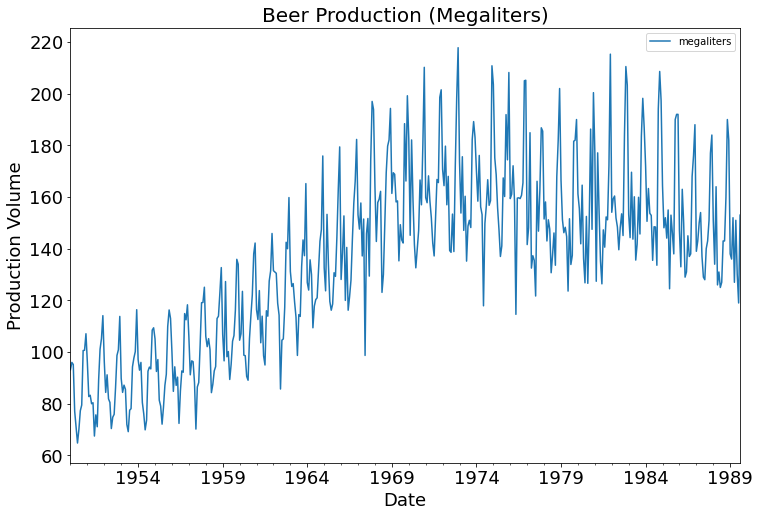

In [ ]:
FONT_SIZE = 18
f = plt.figure(figsize=(12,8))
ax=plt.subplot()
time_series.plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Beer Production (Megaliters)', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Date', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume', size=FONT_SIZE)

### Problem 1b Answer

*Please delete this text and type your answer to Problem 1b here*

## Problem 1c

### Problem 1c Answer

*Please delete this text and type your answer to Problem 1c here*

# Problem 4
Given the time series for Japanese motor vehicle production for 1947–1989 contained in the `time_series` variable below, answer the following questions

### Problem 4a 
Consider the data in a time plot. What features of the data indicate a transformation may be appropriate?

### Problem 4b
Consider the log transformed data in the second time plot. What characteristics of the time series changed?

### Problem 4c
Calculate forecasts for the transformed data for each year from 1948 to 1990 using Na ̈ıve Forecast 1 and compute the forecast errors and calculate the MSE and MAPE from these errors. In what cases would you want to use MSE? What situations would you want to use MAPE?

## Problem 4a

### STEP 1

The `time_series` `DataFrame` contains all of the data for the yearly production of Japanese Automobiles. Below the data is plotted as a simple time series plot.

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

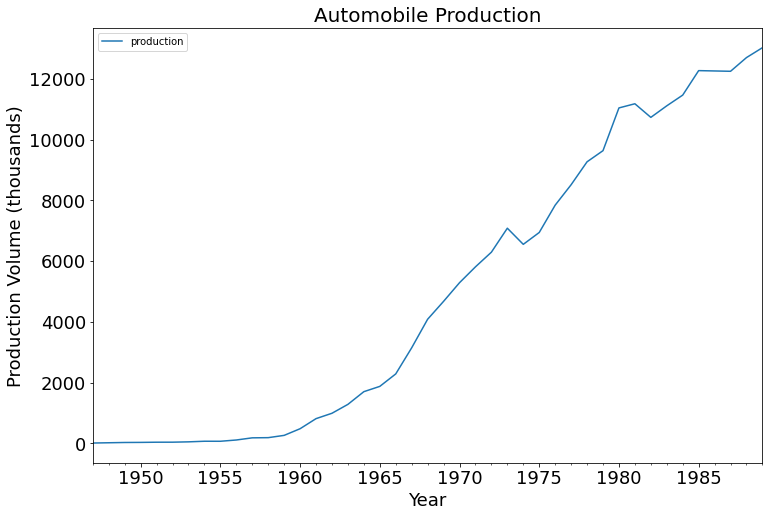

In [ ]:
# Read in the time series data
time_series = pd.read_csv('japanese_auto_production.csv', parse_dates=['year']).set_index('year')

FONT_SIZE = 18
f = plt.figure(figsize=(12,8))

ax=plt.subplot()
time_series.plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Automobile Production', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Year', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume (thousands)', size=FONT_SIZE)

### Problem 4a Answer

Consider the data in a time plot. What features of the data indicate a transformation may be appropriate?

*Please delete this text and type your answer to Problem 4a here*

## Problem 4b

### STEP 1

We can compute the log transform of the `time_series` `DataFrame` by using the `log` function from within the `numpy` python package (used for numerical computing). We'll save it in another column called `log_transforme`, and then plot that column in the same way that we did above. 

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

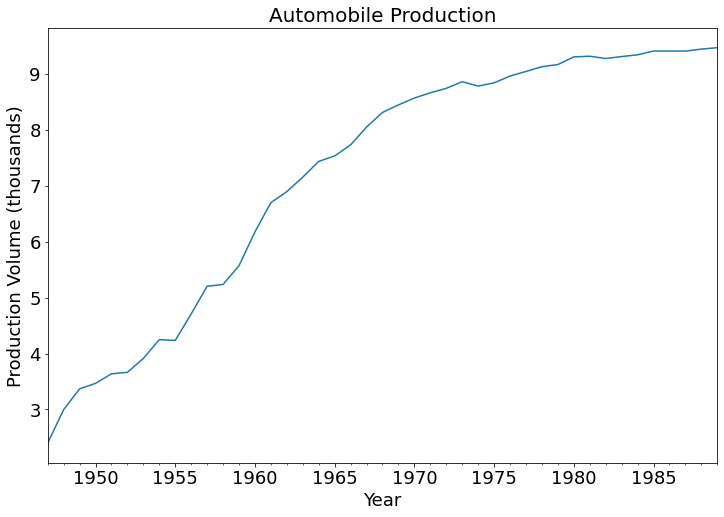

In [ ]:
FONT_SIZE = 18
f = plt.figure(figsize=(12,8))

time_series['log_transform'] = log(time_series.values)

ax=plt.subplot()
time_series['log_transform'].plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Automobile Production', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Year', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume (thousands)', size=FONT_SIZE)

### Problem 4b Answer

Consider the log transformed data in the second time plot. What characteristics of the time series changed?

*Please delete this text and type your answer to Problem 4b here*

## Problem 4c

### STEP 1

To compute the naive forecast, we simply need to shift the values of the time series each month forward by one. To do this, we can use the `pandas` `shift()` function. Below we do that and save it to a new column in the `DataFrame`, then plot the original and naive forecast. 

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

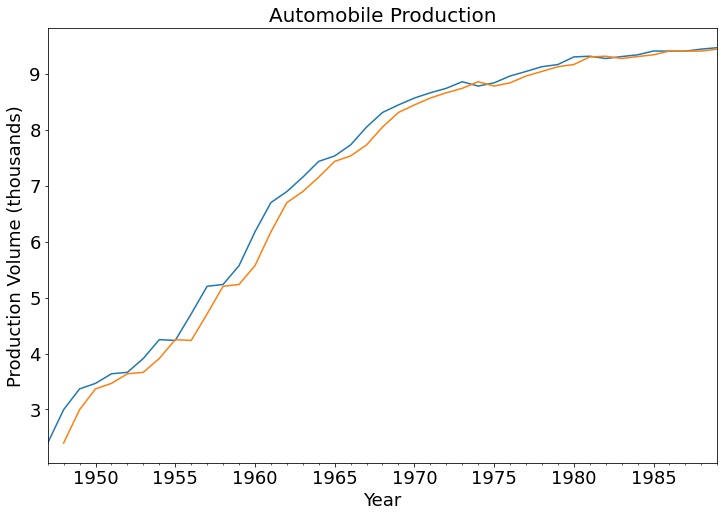

In [ ]:
FONT_SIZE = 18
f = plt.figure(figsize=(12,8))

time_series['forecast'] = time_series['log_transform'].shift(1)

ax=plt.subplot()
time_series['log_transform'].plot(ax=ax,fontsize=FONT_SIZE)
time_series['forecast'].plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Automobile Production', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Year', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume (thousands)', size=FONT_SIZE)

### STEP 2

When we compute our metrics, we should first transform back to the original units be using the inverse of the log transformation, or the exponential function, on our forecast. This function is also contained in the `numpy` package. We'll execute this and create a new column called `inv_forecast`. 

Below we plot the original production data along with the inverse-transformed forecast. 

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

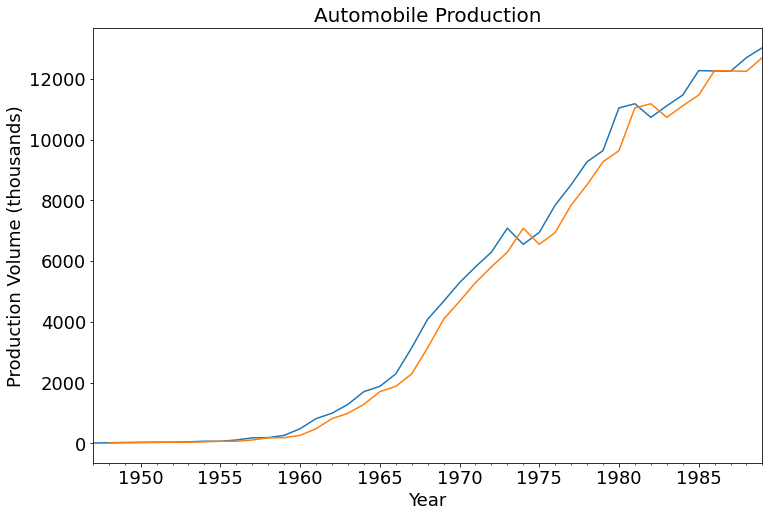

In [ ]:
time_series['inv_forecast'] = exp(time_series['forecast'])

FONT_SIZE = 18
f = plt.figure(figsize=(12,8))

ax=plt.subplot()
time_series['production'].plot(ax=ax,fontsize=FONT_SIZE)
time_series['inv_forecast'].plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Automobile Production', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Year', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume (thousands)', size=FONT_SIZE)

### STEP 3

To compute the mean absolute error (MAE), we can simply take the difference between the `production` and `inv_forecast` columns and campute the absolute value with the `numpy` `abs` function. 

We can additionally divide by the original `production` column to calculate the mean absolute percent error (MAPE).

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

In [ ]:
MAE = mean(abs(time_series['production'] - time_series['inv_forecast']))

MAPE = mean(abs(time_series['production'] - time_series['inv_forecast']) / time_series['production'])

print('MAE: {:.2f}'.format(MAE))
print('MAPE: {:.2f}'.format(MAPE))

MAE: 357.60
MAPE: 0.15


### Problem 4c Answer

Calculate forecasts for the transformed data for each year from 1948 to 1990 using Na ̈ıve Forecast 1 and compute the forecast errors and calculate the MSE and MAPE from these errors. In what cases would you want to use MSE? What situations would you want to use MAPE? 

*Please delete this text and type your answer to Problem 4c here*